## 빅데이터 실습

### 타이타닉 생존자 상관분석
- 상관계수로 두 변수간의 상관관계 유추
  - correlation coefficient

- 상관계수 값(-1~0~1)
  - 음수면 서로간의 음의 상관관계(한쪽값이 올라가면, 다른값은 떨어짐)
  - 양수면 서로간의 양의 상관관계(한쪽값이 올라가면, 다른값도 올라감)
  - 0.0 ~ 0.2: 상관관계가 거의 없다
  - 0.2 ~ 0.4: 약한 상관관계가 있다.
  - 0.4 ~ 0.6: 상관관계가 있다.
  - 0.6 ~ 0.8: 강한 상관관계가 있다.
  - 0.8 ~ 1.0: 매우 강한 상관관계가 있다.

#### 데이터 수집

##### Seaborn 테스트데이터

##### 데이터 수집

##### Seaborn 테스트데이터

In [84]:
## 필수 라이브러리 사용등록
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' # 나눔고딕코딩 사용, 나눔고딕에서 오류발생(!)
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

In [86]:
sns.set_style('darkgrid')

In [87]:
# seaborn 타이타닉 데이터
dfTitanic = sns.load_dataset('titanic')
dfTitanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


##### 타이타닉 생존자 데이터의 문제
- 결측치가 많음 -> 결측치 제거

In [88]:
dfTitanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- age(177), embarked, embark_town(2), deck(688) 결측치 확인

##### 결측치를 채워넣는 방법
- DF.describe()로 구해지는 기술통계값을 기준으로 채워넣는게 가장 일반적
1. 평균값으로
2. 중앙값으로
3. 최빈값(min)으로 - 해당 값이 데이터가 너무 없어서 통계내기 어렵기 때문에
4. 최대값(max)으로 - 대부분이 해당 값이므로 

In [89]:
dfTitanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
# 조사결과 나이대는 20대 중후반이 가장 많음
ageMedian = dfTitanic['age'].median()

In [91]:
# 나이에 빈값을 중앙값으로 채워넣음
dfTitanic['age'] = dfTitanic['age'].fillna(ageMedian)

In [92]:
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [93]:
# 정박함 결측치 입력, 대부분 S(Southampthon)에서 배를 탔음
dfTitanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [94]:
dfTitanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [95]:
dfTitanic['embarked'] = dfTitanic['embarked'].fillna('S')

In [96]:
dfTitanic['embark_town'] = dfTitanic['embark_town'].fillna('Southampton')

In [97]:
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [98]:
dfTitanic.to_excel('./data/타이타닉생존자_전처리완.xlsx', index=False)

##### 시각화

In [99]:
dfTitanic['survived'][dfTitanic['sex'] == 'male'].value_counts()

survived
0    468
1    109
Name: count, dtype: int64

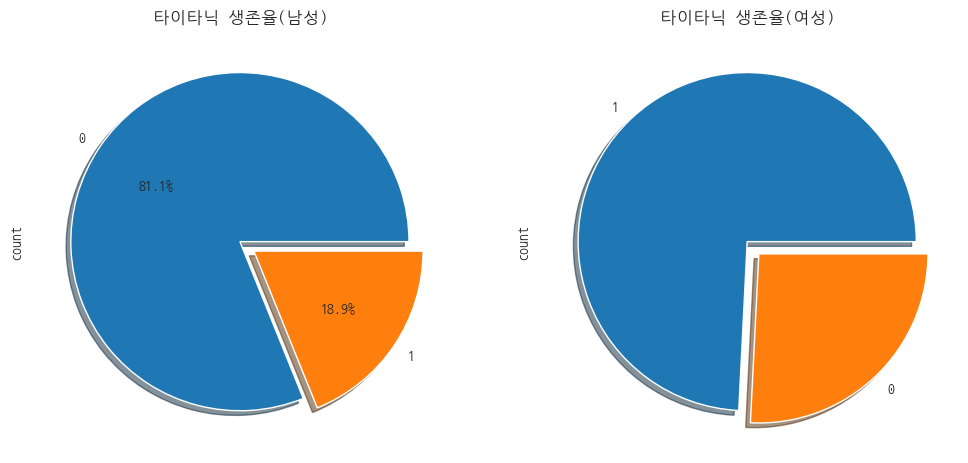

In [106]:
#파이차트
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# 판다스 DF, 시리즈는 matplotlib 차트로 그릴 수 있음
dfTitanic['survived'][dfTitanic['sex'] == 'male'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=[0, 0.1], autopct='%1.1f%%')
dfTitanic['survived'][dfTitanic['sex'] == 'female'].value_counts().plot.pie(ax=ax[1], shadow=True, explode=[0, 0.1], autopct='%1.1f%%')

ax[0].set_title('타이타닉 생존율(남성)')
ax[1].set_title('타이타닉 생존율(여성)')

plt.show()